# 911 Calls Capstone Project

I have analyzed some **'911 call'** data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup

____
**Import analysis libraries.**

In [1]:
import numpy as np
import pandas as pd

**Import visualization libraries.**

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

- **%matplotlib inline** is only for jupyter notebooks, if we use another editor, we'll use: plt.show() at the end of all our plotting commands to have the figure pop up in another window.
Easily visualize our data without saving plots as image files or opening them in a separate window.

In [115]:
import seaborn as sns
sns.set_style('whitegrid')

In [116]:
#There are particular styles to set. For example: sns.set_style('white'), sns.set_style('ticks')

**Read in the csv file.**

In [117]:
df = pd.read_csv('911.csv')

**Check the info() of the df**

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [119]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Analyzing data

**The top 5 zipcodes for 911 calls:**

In [120]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**The top 5 townships (twp) for 911 calls:**

In [121]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Number of unique title codes in the 'title' column:**

In [122]:
df['title'].nunique()

110

## Creating new features

In [123]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [124]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

- In the 'title' column there are "Reasons" specified before the title code. These are **EMS, Fire, and Traffic**. 
- So, I created a new column called **"Reason"**. The **"Reason"** column shows why 911 was called.

- **For example, if the title column value is 'Fire: GAS-ODOR/LEAK' , the Reason column value would be Fire.**

In [125]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

- I used **lambda** expression to create new column.

In [126]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**The most common Reason for a 911 call:**

In [127]:
 df['Reason'].value_counts() 

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Creating a countplot of 911 calls by Reason using seaborn:** 

<AxesSubplot:xlabel='Reason', ylabel='count'>

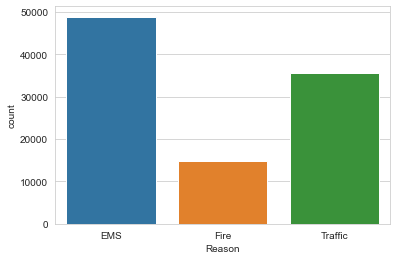

In [128]:
sns.countplot(x='Reason', data=df) # Renglerle isle!!!!

___
**I worked on the time information.**

In [129]:
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [130]:
df['timeStamp'][0]

'2015-12-10 17:40:00'

In [131]:
type(df['timeStamp'][0])

str

- **I used [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [132]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [133]:
df['timeStamp'].head(2)

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
Name: timeStamp, dtype: datetime64[ns]

In [134]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS


In [135]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

- I looked at the first row for the "timeStamp" column. 
- It was 2015-12-10 17:40:00.
- I can use hour, month, day of week, year, and such information separately.

In [136]:
time.hour

17

In [137]:
time.month

12

In [138]:
time.dayofweek

3

In [139]:
time.dayofyear

344

In [140]:
time.day

10

- I have converted the **timestamp** column from **"string"** to **DateFrame objects**. 
- I have used **apply()** function to create **"Hour", "Month", and "Day of Week"** columns that contain the date from the timeStamp column. 

In [141]:
df['timeStamp'].apply(lambda time: time.dayofweek)

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: timeStamp, Length: 99492, dtype: int64

In [142]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

df['Month'] = df['timeStamp'].apply(lambda time: time.month)

df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [143]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3


In [144]:
df['Day of Week'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Day of Week, dtype: int64

- The days of the week were with numbers.
- I have changed the days of the week from number to those days' names.
- So, I have converted it from a number to a string.

- dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [145]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [146]:
df['Day of Week'] = df['Day of Week'].map(dmap)

df['Day of Week']

0        Wed
1        Wed
2        Wed
3        Wed
4        Wed
        ... 
99487    Tue
99488    Tue
99489    Tue
99490    Tue
99491    Tue
Name: Day of Week, Length: 99492, dtype: object

In [152]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Wed
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Wed
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Wed
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Wed
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Wed


- **Using Seaboard, I have shown the relationship between the days of the week and the reason.**

- **For example, I can conclude from the graph below that every day of the week 911 receives the most calls due to EMS, while the least number of calls are made due to Fire.**


- **The result between days of the week and Reasons is as below:**

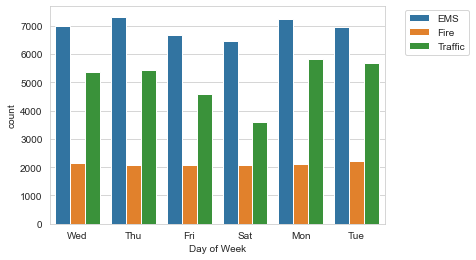

In [153]:
sns.countplot(x='Day of Week', data=df, hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)

- **I did the same for Month:**

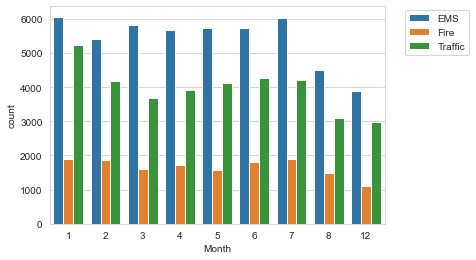

In [155]:
sns.countplot(x='Month', data=df, hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4)

- **I can conclude from the graph that each Month 911 receives the most calls due to EMS, while the least number of calls are made due to Fire.**


_____

- **I noticed that some Months were missing.**

- **So, I have created a gropuby object called byMonth, where I have grouped the DataFrame by the month column.

In [156]:
byMonth = df.groupby('Month').count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,11478
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,9503
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,9566
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,9728
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,9644
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,10169
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,10445
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,7567
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,6712


<AxesSubplot:xlabel='Month'>

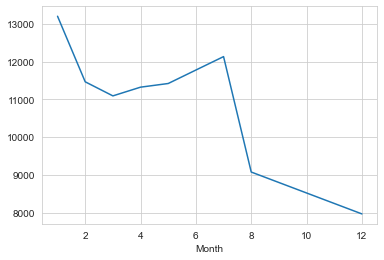

In [158]:
byMonth['twp'].plot()

<AxesSubplot:xlabel='Month'>

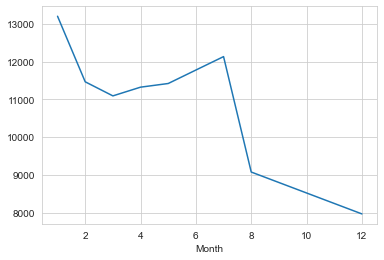

In [160]:
#It is the same as the first plot.

df.groupby('Month').count()['twp'].plot()

- I used seaborn's lmplot() to create a linear fit on the number of calls per month. 
- I had to reset the index to a column. 

In [161]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,11478
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,9503
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,9566
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,9728
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,9644
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,10169
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,10445
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,7567
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,6712


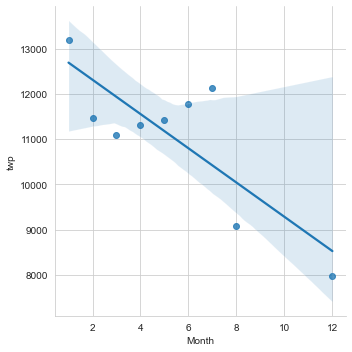

In [162]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

- I have used **apply()** function to create **"Date"** columns that contain the date from the timeStamp column. 

In [163]:
df['timeStamp'].apply(lambda time: time.date())

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: timeStamp, Length: 99492, dtype: object

In [164]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [165]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Wed,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Wed,2015-12-10


**I grouped this Date column with the count() aggregate and created a plot of counts of 911 calls.**

In [166]:
df.groupby('Date').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,0


In [167]:
df.groupby('Date').count()['twp']

Date
2015-12-10    115
2015-12-11    395
2015-12-12    403
2015-12-13    319
2015-12-14    446
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    388
2016-08-23    439
2016-08-24    132
Name: twp, Length: 259, dtype: int64

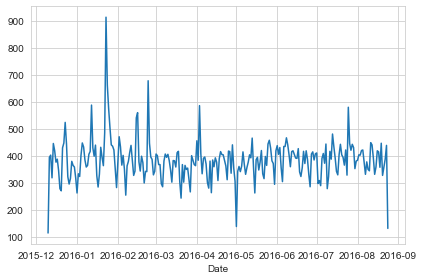

In [169]:
df.groupby('Date').count()['twp'].plot()

plt.tight_layout()

**I recreated this plot but created 3 separate plots with each plot representing a Reason for the 911 call.**

In [170]:
df['Reason'] == 'Traffic'

0        False
1        False
2        False
3        False
4        False
         ...  
99487     True
99488     True
99489    False
99490    False
99491     True
Name: Reason, Length: 99492, dtype: bool

In [171]:
df[df['Reason'] == 'Traffic'].head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,Wed,2015-12-10
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic,17,12,Wed,2015-12-10
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic,17,12,Wed,2015-12-10
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic,17,12,Wed,2015-12-10
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic,17,12,Wed,2015-12-10


In [172]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'] 

Date
2015-12-10     43
2015-12-11    141
2015-12-12    146
2015-12-13     78
2015-12-14    186
             ... 
2016-08-20    117
2016-08-21    138
2016-08-22    156
2016-08-23    151
2016-08-24     42
Name: twp, Length: 259, dtype: int64

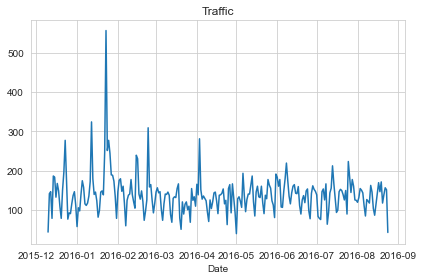

In [173]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()

plt.title('Traffic')
plt.tight_layout()

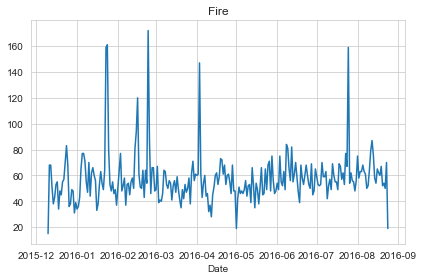

In [174]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()

plt.title('Fire')
plt.tight_layout()

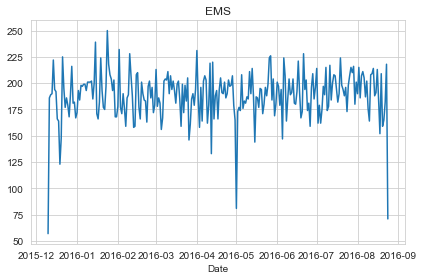

In [175]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()

plt.title('EMS')
plt.tight_layout()

____
- I created heatmaps with Seaborn and my data. I first needed to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. I combined groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. 

In [176]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Wed,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Wed,2015-12-10


In [177]:
test = df.groupby(by=['Day of Week', 'Hour']).count()['Reason']
test.head()

Day of Week  Hour
Fri          0       375
             1       301
             2       263
             3       260
             4       224
Name: Reason, dtype: int64

In [178]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Mon,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Sat,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Tue,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


- **I have created a HeatMap using this new DataFrame:**

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

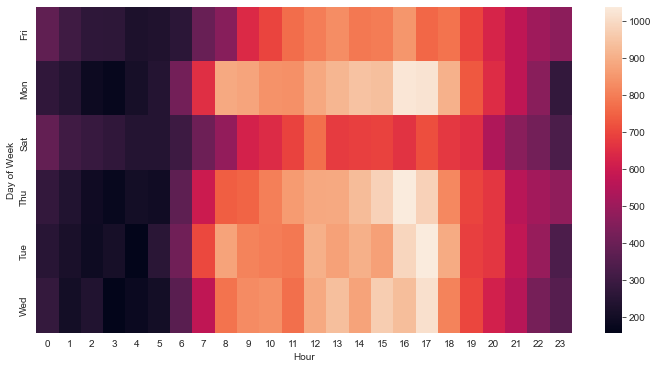

In [179]:
plt.figure(figsize=(12,6))

sns.heatmap(dayHour)

**I have created a clustermap using this DataFrame:**

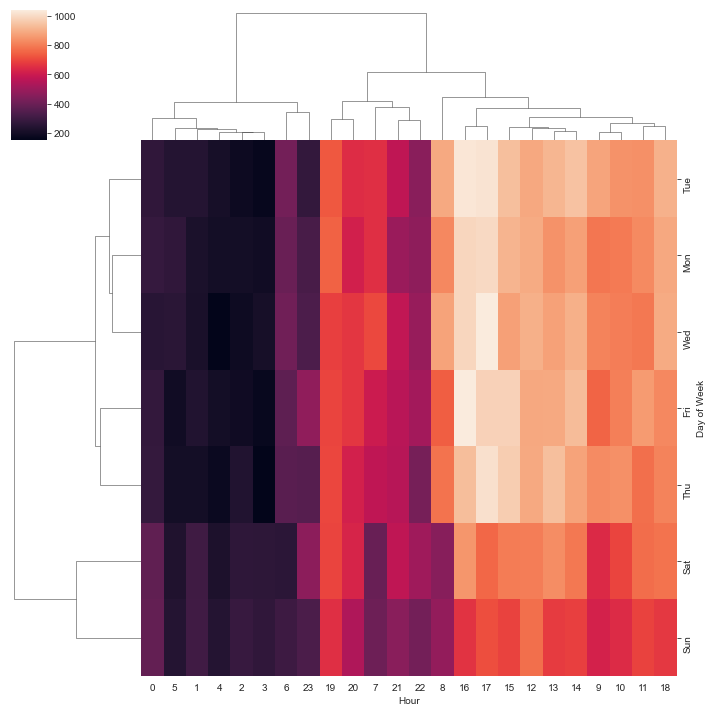

In [159]:
sns.clustermap(dayHour)

**I have repeated these same plots and operations, for a DataFrame that shows the Month as the column.**

In [180]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,2291,1441,1266,1734,1444,1388,1695,1099,978
Mon,1973,1753,1884,1430,1918,1676,1670,1612,1234
Sat,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1970,1581,1525,1958,1730,1649,2045,1310,1065
Tue,1700,1903,1889,1517,1538,2058,1717,1295,1262


In [171]:
# dayMonth['Reason']

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

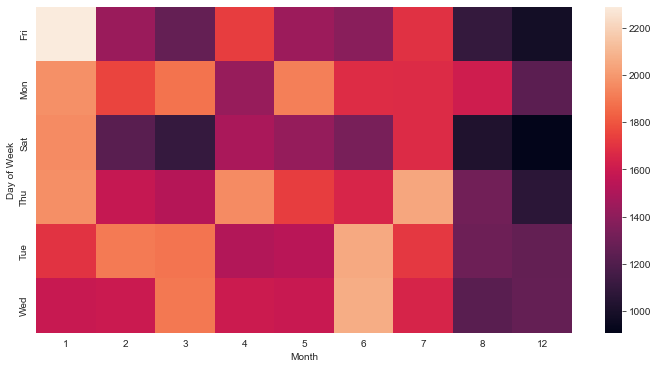

In [181]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

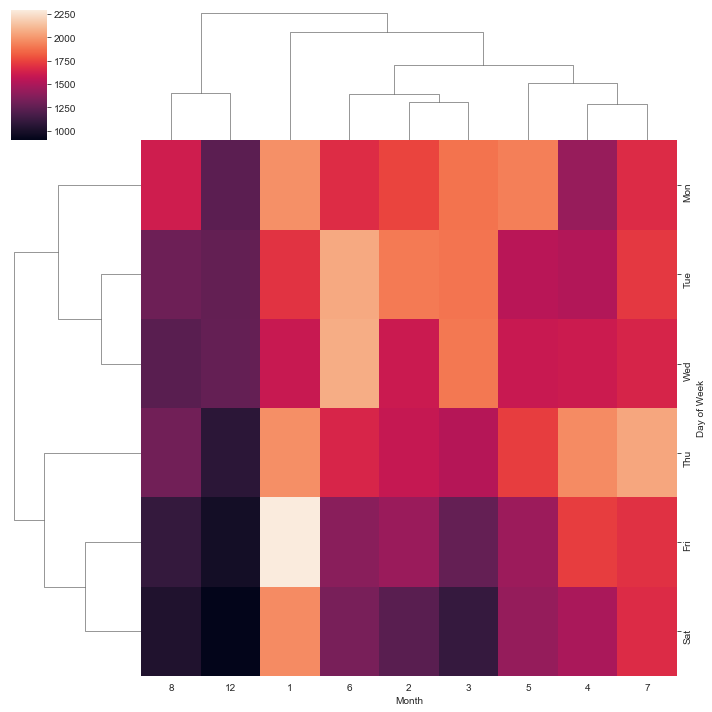

In [183]:
sns.clustermap(dayMonth)

# Thank you!!